<a href="https://colab.research.google.com/github/chlin1/TimeSeries/blob/master/Inception_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Inception module](http://marubon-ds.blogspot.com/2018/06/how-to-write-inception-module.html?m=1)



In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))[0:2000]
y_train = to_categorical(y_train, 10)[0:2000]

11493376/11490434 [==============================] - 0s 0us/step


## The naive_inception
The naive_inception() expresses naive version of Inception module. Three types of kernels are used and concatenated.

In [0]:
import keras
from keras.layers import Dense, Input, Conv2D, Flatten, concatenate
from keras.models import Model

def naive_inception(inputs):

    towerOne = Conv2D(6, (1,1), activation='relu', border_mode='same')(inputs)
    towerTwo = Conv2D(6, (3,3), activation='relu', border_mode='same')(inputs)
    towerThree = Conv2D(6, (5,5), activation='relu', border_mode='same')(inputs)
    x = concatenate([towerOne, towerTwo, towerThree], axis=3)
    return x

## Inception module with dimension reduction

In [0]:
def dimension_reduction_inception(inputs):
    tower_one = MaxPooling2D((3,3), strides=(1,1), padding='same')(inputs)
    tower_one = Conv2D(6, (1,1), activation='relu', border_mode='same')(tower_one)

    tower_two = Conv2D(6, (1,1), activation='relu', border_mode='same')(inputs)
    tower_two = Conv2D(6, (3,3), activation='relu', border_mode='same')(tower_two)

    tower_three = Conv2D(6, (1,1), activation='relu', border_mode='same')(inputs)
    tower_three = Conv2D(6, (5,5), activation='relu', border_mode='same')(tower_three)
    x = concatenate([towerOne, towerTwo, towerThree], axis=3)
    return x

## MNIST with the naive_inception

In [6]:
def naive_model(x_train):

    inputs = Input(x_train.shape[1:])

    x = naive_inception(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(input=inputs, output=predictions)

    model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.SGD(lr=0.0001),
                 metrics=['accuracy'])
    return model

modelA = naive_model(x_train)
modelA.fit(x_train, y_train, epochs=50, shuffle=True,  validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (1, 1), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 3s 1ms/step - loss: 9.7523 - acc: 0.3617 - val_loss: 7.7163 - val_acc: 0.4850
Epoch 2/50
1800/1800 [==============================] - 2s 1ms/step - loss: 7.5235 - acc: 0.5061 - val_loss: 6.6882 - val_acc: 0.5600
Epoch 3/50
1800/1800 [==============================] - 2s 1ms/step - loss: 6.5948 - acc: 0.5650 - val_loss: 5.7328 - val_acc: 0.6100
Epoch 4/50
1800/1800 [==============================] - 2s 1ms/step - loss: 5.8731 - acc: 0.6083 - val_loss: 6.7353 - val_acc: 0.5250
Epoch 5/50
1800/1800 [==============================] - 2s 1ms/step - loss: 5.3580 - acc: 0.6400 - val_loss: 4.7710 - val_acc: 0.6550
Epoch 6/50
1800/1800 [==============================] - 2s 1ms/step - loss: 4.6331 - acc: 0.6872 - val_loss: 4.0941 - val_acc: 0.7050
Epoch 7/50
1800/1800 [==============================] - 2s 1ms/step - loss: 4.2060 - acc: 0.7139 - val_loss: 3.4604 - val_acc: 0.7550
Epoch 8/50
1800

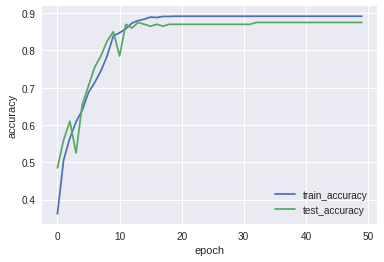

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(modelA.history)

## MNIST with Inception module with dimension reduction

In [8]:
def dimension_reduction_model(x_train):

    inputs = Input(x_train.shape[1:])

    x = dimension_reduction_inception(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(input=inputs, output=predictions)

    model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.SGD(lr=0.0001),
                 metrics=['accuracy'])
    return model

modelB = naive_model(x_train)
modelB.fit(x_train, y_train, epochs=50, shuffle=True,  validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (1, 1), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 3s 1ms/step - loss: 10.6672 - acc: 0.3106 - val_loss: 7.8847 - val_acc: 0.4900
Epoch 2/50
1800/1800 [==============================] - 2s 1ms/step - loss: 6.1247 - acc: 0.5817 - val_loss: 5.6498 - val_acc: 0.6200
Epoch 3/50
1800/1800 [==============================] - 2s 1ms/step - loss: 4.6057 - acc: 0.6817 - val_loss: 5.9498 - val_acc: 0.5950
Epoch 4/50
1800/1800 [==============================] - 2s 1ms/step - loss: 3.6929 - acc: 0.7339 - val_loss: 3.9952 - val_acc: 0.7250
Epoch 5/50
1800/1800 [==============================] - 2s 1ms/step - loss: 2.5967 - acc: 0.8111 - val_loss: 2.6788 - val_acc: 0.7950
Epoch 6/50
1800/1800 [==============================] - 2s 1ms/step - loss: 2.1172 - acc: 0.8428 - val_loss: 2.5586 - val_acc: 0.8150
Epoch 7/50
1800/1800 [==============================] - 2s 1ms/step - loss: 1.8404 - acc: 0.8650 - val_loss: 2.9808 - val_acc: 0.7700
Epoch 8/50
180

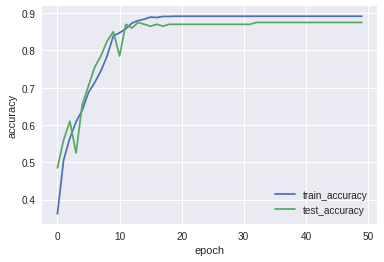

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(modelA.history)

## Inception module

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

## cifar10

Each image is represented as 32x32 pixels each for red, blue and green channels. Each pixel has a value between 0–255. Next, we normalize the values to 0–1.

In [11]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0



Exception: ignored

In order to best model the classification model, we convert y_test and y_train to one hot representations in the form of a binary matrix.

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

The latest Keras functional API allows us to define complex models. In order to create a model, let us first define an input_img tensor for a 32x32 image with 3 channels(RGB).

In [0]:
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))

we feed the input tensor to each of the 1x1, 3x3, 5x5 filters in the inception module

The padding is kept same so that the output shape of the Conv2D operation is same as the input shape. So, the final output of each filter of tower_1, tower_2 and tower_3 is same. Thus we can easily concatenate these filters to form the output of our inception module.

In [0]:
from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

In [0]:
from keras.layers import Flatten, Dense
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

In [0]:
from keras.models import Model
model = Model(inputs = input_img, outputs = out)
# print model.summary()

In [0]:
from keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

In [0]:
from keras.models import model_from_json
import os
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(os.path.join(os.getcwd(), 'model.h5'))

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))